# Bibliotecas

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from pyproj import Transformer
import contextily as ctx

# VOLUME DE CAP

# Gerando os dados a partir da planilha

In [2]:
data = {
    'CP': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'BE-sup': [5.42, 5.60, 5.81, 5.68, 5.45, 5.43, 5.91, 5.70, 5.95, 5.46, 4.85, 4.46, 5.26, 4.79, 5.00, 4.75, 4.73, 4.81, 4.97, 4.62, 5.04],
    'CP_2': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42],
    'B-sup': [5.98, 5.49, 4.48, 5.49, 5.09, 5.07, 5.53, 5.42, 5.21, 5.28, 4.98, 5.40, 4.72, 4.75, 4.75, 4.63, 4.78, 4.53, 4.80, 4.75, 4.07],
    'CP_3': [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
    'C': [5.36, 4.75, 4.28, 3.81, 4.67, 4.05, 5.19, 4.33, 5.03, 4.95, 5.54, 4.05, 3.01, 4.54, 3.06, 3.25, 4.89, 4.04, 3.39, 3.35, 3.64],
    'CP_4': [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
    'B-inf': [5.91, 4.49, 5.47, 4.35, 5.22, 4.97, 4.77, 5.18, 5.49, 5.03, 5.33, 4.02, 5.08, 5.05, 4.88, 4.83, 4.35, 5.11, 4.47, 4.30, 4.84],
    'CP_5': [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105],
    'BE-inf': [5.63, 4.70, 4.87, 4.84, 5.29, 4.95, 4.82, 5.51, 5.58, 5.25, 5.73, 5.22, 5.85, 5.04, 4.51, 4.72, 4.45, 4.78, 4.64, 4.41, 4.51]
}

df_cap = pd.DataFrame(data)

In [3]:
print(df_cap.shape)
df_cap.head()

(21, 10)


,CP,BE-sup,CP_2,B-sup,CP_3,C,CP_4,B-inf,CP_5,BE-inf
0,1,5.42,22,5.98,43,5.36,64,5.91,85,5.63
1,2,5.60,23,5.49,44,4.75,65,4.49,86,4.70
2,3,5.81,24,4.48,45,4.28,66,5.47,87,4.87
3,4,5.68,25,5.49,46,3.81,67,4.35,88,4.84
4,5,5.45,26,5.09,47,4.67,68,5.22,89,5.29


# Visualizando 

### Média

C:\Users\patri\AppData\Local\Temp\ipykernel_20648\3852877657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Columns', y='Mean Values', palette='Set2')


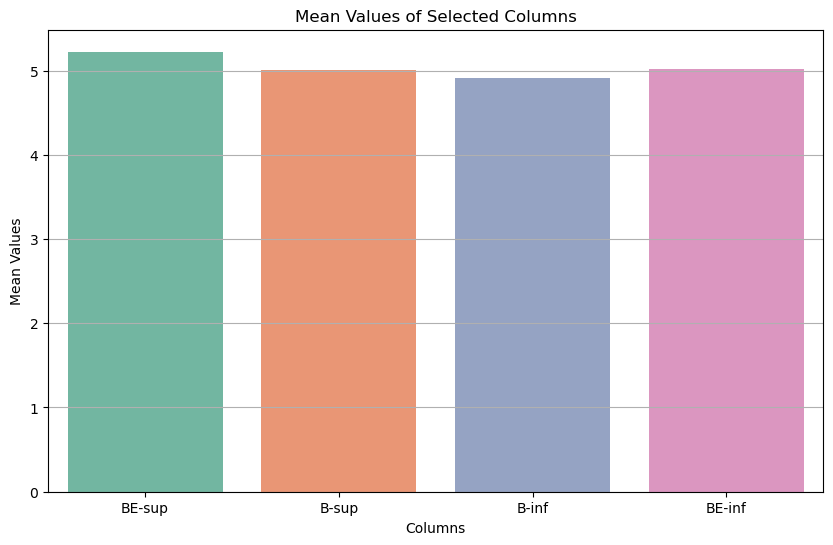

In [4]:
# Plotting with seaborn without excluding 'C' from the dataframe, but only plotting the selected columns
means = df_cap[['BE-sup', 'B-sup', 'B-inf', 'BE-inf']].mean().reset_index()
means.columns = ['Columns', 'Mean Values']

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=means, x='Columns', y='Mean Values', palette='Set2')

plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values of Selected Columns')
plt.grid(axis='y')
plt.show()


### Variabilidade 

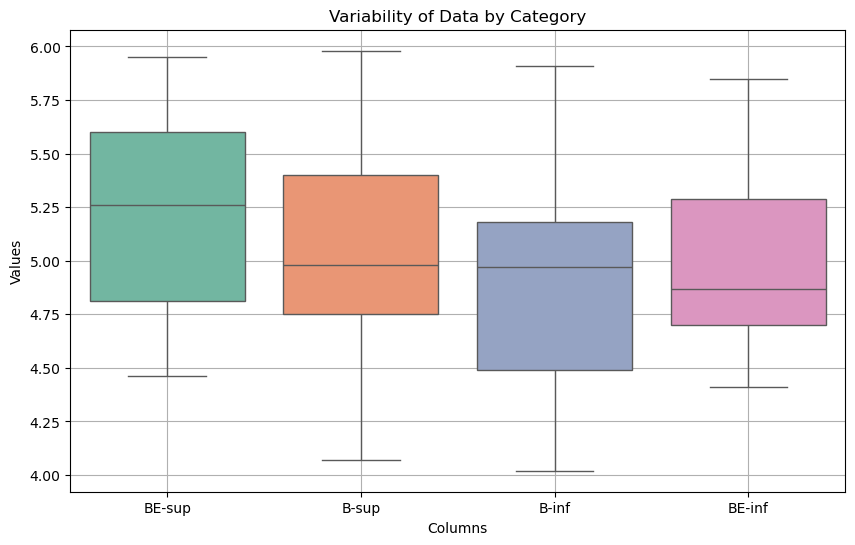

In [5]:
# Plotting a boxplot to show the variability of the data by category using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cap[['BE-sup', 'B-sup', 'B-inf', 'BE-inf']], palette='Set2')

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Variability of Data by Category')
plt.grid(True)
plt.show()


## Por CP - Variabilidade ao longo do trecho

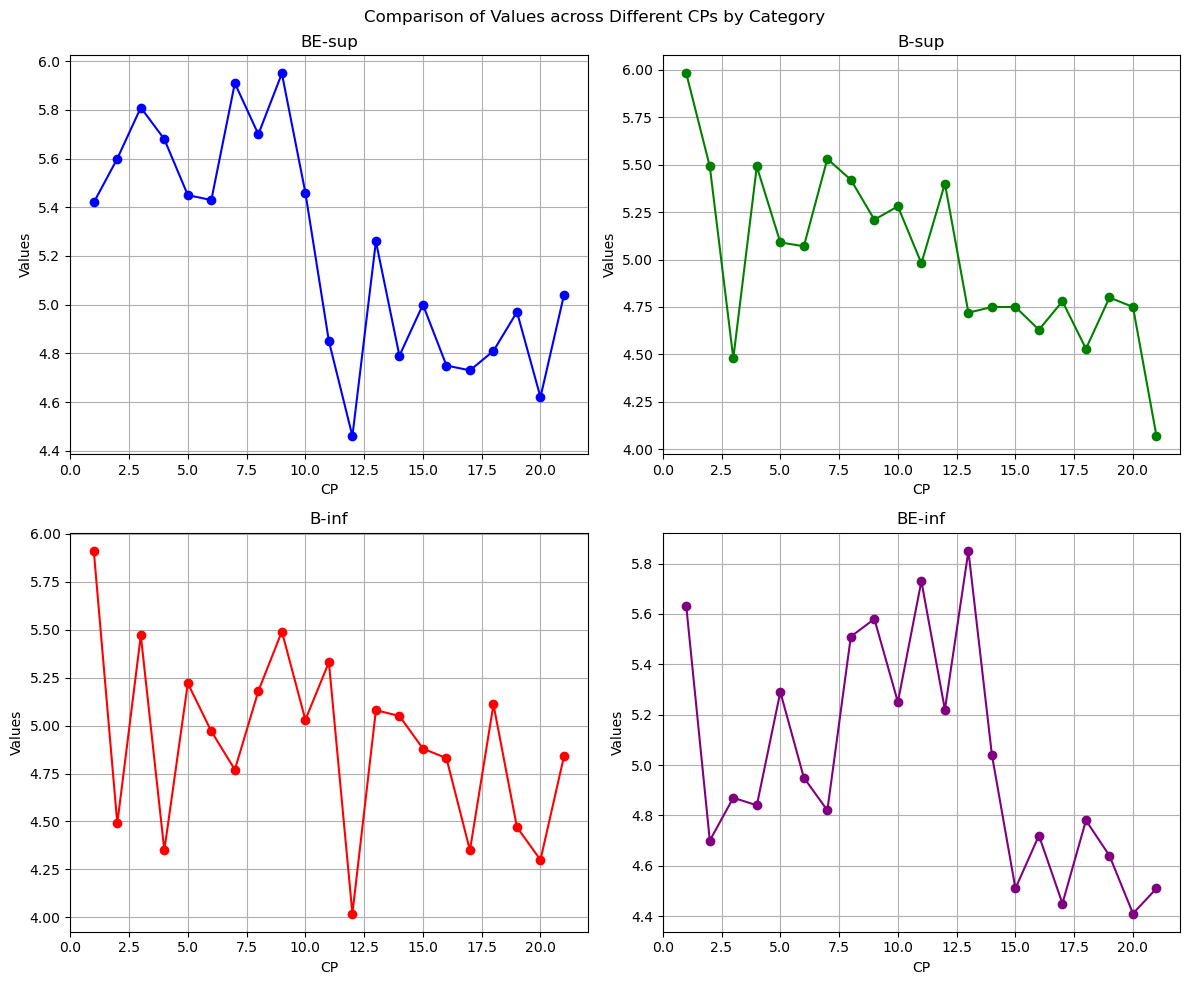

In [6]:
# Plotting each category in a 2x2 grid

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot BE-sup
axs[0, 0].plot(df_cap['CP'], df_cap['BE-sup'], label='BE-sup', marker='o', color='blue')
axs[0, 0].set_title('BE-sup')
axs[0, 0].set_xlabel('CP')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)

# Plot B-sup
axs[0, 1].plot(df_cap['CP'], df_cap['B-sup'], label='B-sup', marker='o', color='green')
axs[0, 1].set_title('B-sup')
axs[0, 1].set_xlabel('CP')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

# Plot B-inf
axs[1, 0].plot(df_cap['CP'], df_cap['B-inf'], label='B-inf', marker='o', color='red')
axs[1, 0].set_title('B-inf')
axs[1, 0].set_xlabel('CP')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

# Plot BE-inf
axs[1, 1].plot(df_cap['CP'], df_cap['BE-inf'], label='BE-inf', marker='o', color='purple')
axs[1, 1].set_title('BE-inf')
axs[1, 1].set_xlabel('CP')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

# Adjusting layout
plt.suptitle('Comparison of Values across Different CPs by Category')
plt.tight_layout()
plt.show()


## Heatmap

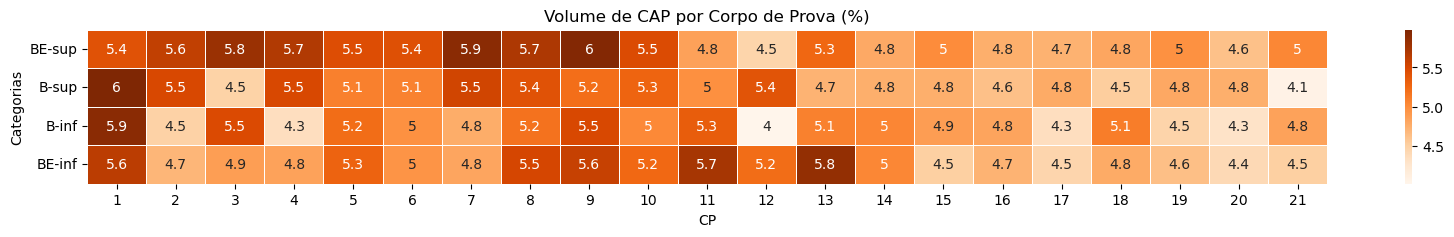

In [22]:
plt.figure(figsize=(20, 2))  # Aumenta o comprimento (colunas) e reduz a largura (linhas)
sns.heatmap(df_cap.set_index('CP').T, annot=True, cmap='Oranges', cbar=True, linewidths=0.5)
plt.title('Volume de CAP por Corpo de Prova (%)')
plt.xlabel('CP')
plt.ylabel('Categorias')
plt.show()

## Variabilidade lateral vs longitudinal 

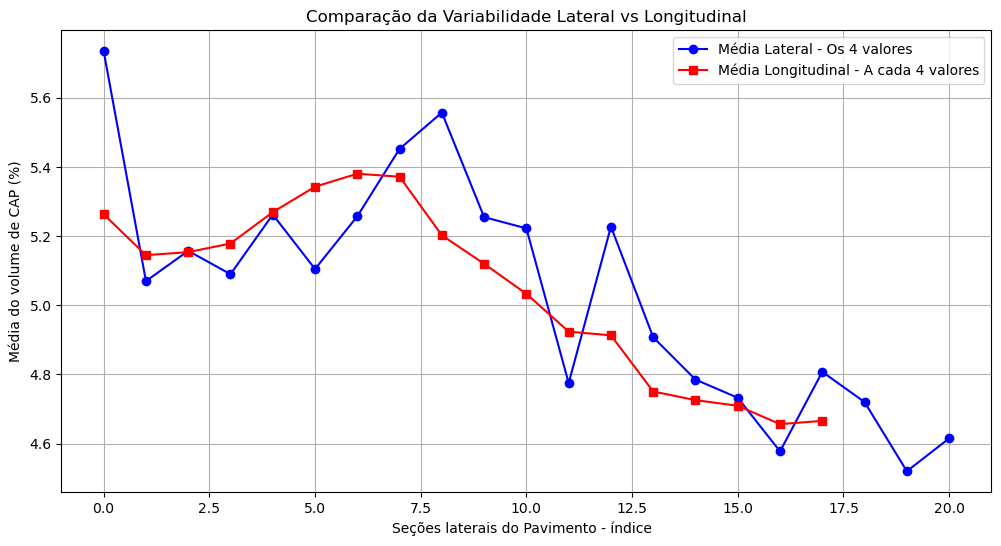

In [43]:
# Média lateral - por linha
df_cap['Mean_Lateral'] = df_cap[['BE-sup', 'B-sup', 'B-inf', 'BE-inf']].mean(axis=1)

# Média longitudinal - por coluna - primeiros 4, pula 1, e próximos 4 (com sobreposição)
mean_longitudinal_custom = []
for i in range(0, len(df_cap) - 3, 1):
    mean_longitudinal_custom.append(df_cap.iloc[i:i+4][['BE-sup', 'B-sup', 'B-inf', 'BE-inf']].mean().mean())

mean_longitudinal_custom = np.array(mean_longitudinal_custom)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_cap.index, df_cap['Mean_Lateral'], label='Média Lateral - Os 4 valores ', marker='o', color='blue')
plt.plot(range(len(mean_longitudinal_custom)), mean_longitudinal_custom, label='Média Longitudinal - A cada 4 valores', marker='s', color='red')

plt.title('Comparação da Variabilidade Lateral vs Longitudinal')
plt.xlabel('Seções laterais do Pavimento - índice  ')
plt.ylabel('Média do volume de CAP (%)')
plt.legend()
plt.grid(True)
plt.show()

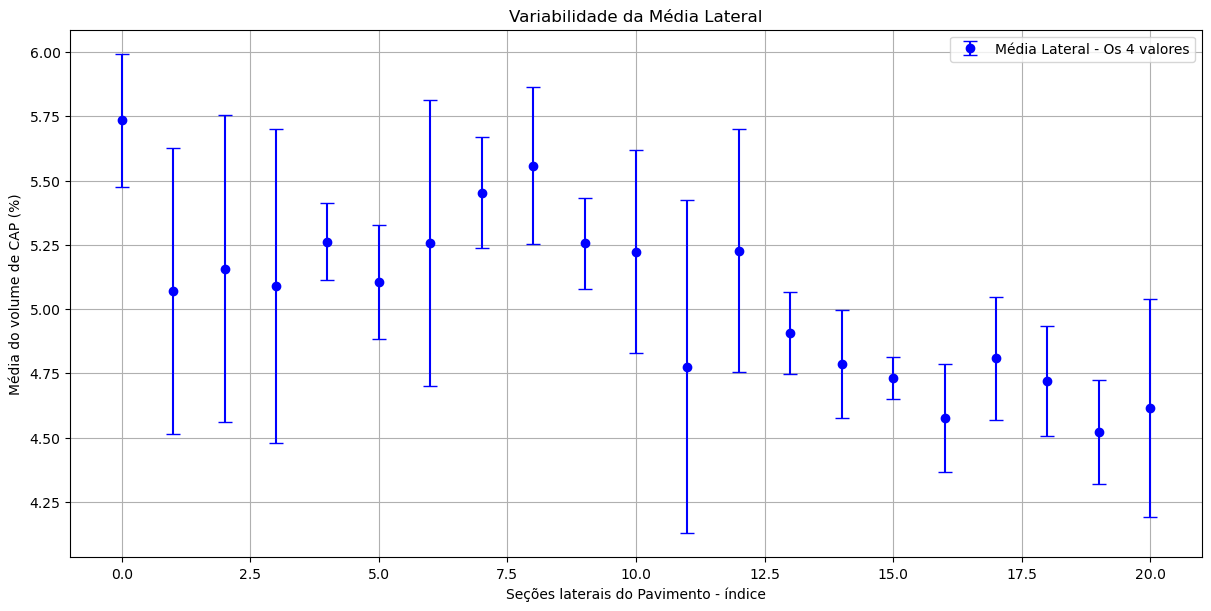

In [52]:
# Criando a figura para o gráfico lateral apenas
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Gráfico para Média Lateral
ax.errorbar(df_cap.index, df_cap['Mean_Lateral'], yerr=std_lateral, label='Média Lateral - Os 4 valores', marker='o', color='blue', linestyle='none', capsize=5)
ax.set_title('Variabilidade da Média Lateral')
ax.set_xlabel('Seções laterais do Pavimento - índice')
ax.set_ylabel('Média do volume de CAP (%)')
ax.grid(True)
ax.legend()

plt.show()


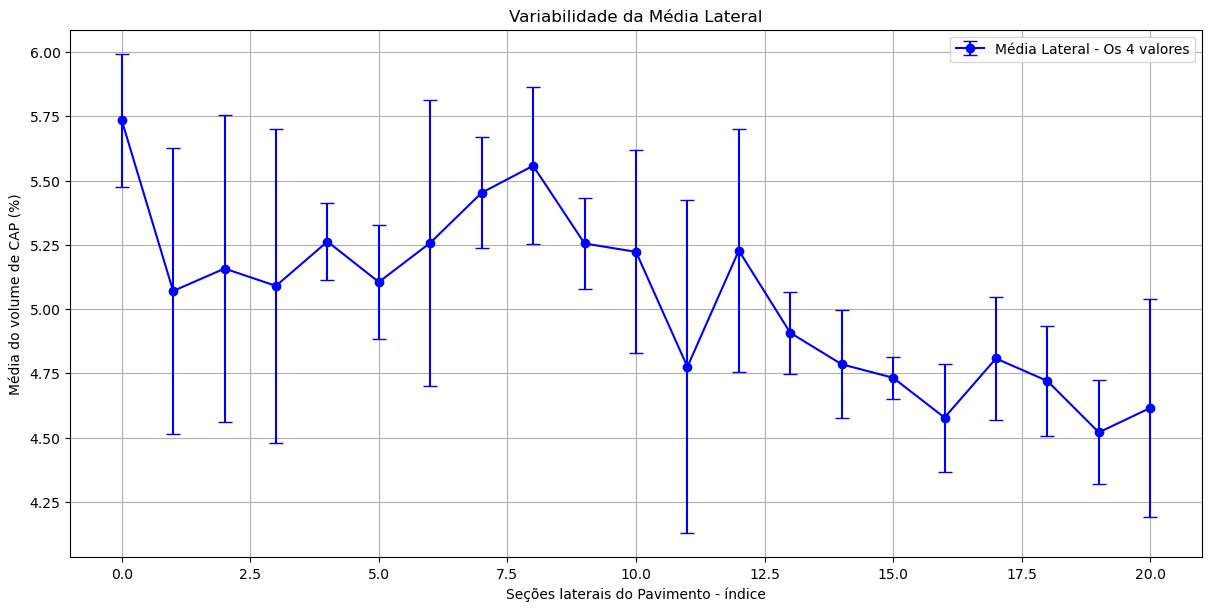

In [53]:
# Criando a figura para o gráfico lateral com linha conectando os pontos médios
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Gráfico para Média Lateral com linha conectando os pontos médios
ax.errorbar(df_cap.index, df_cap['Mean_Lateral'], yerr=std_lateral, label='Média Lateral - Os 4 valores', marker='o', color='blue', linestyle='-', capsize=5)
ax.set_title('Variabilidade da Média Lateral')
ax.set_xlabel('Seções laterais do Pavimento - índice')
ax.set_ylabel('Média do volume de CAP (%)')
ax.grid(True)
ax.legend()

plt.show()


# VOLUME DE VAZIOS

## Gerando os dados a partir da planilha

In [7]:
# Creating a new DataFrame with the provided data
data_v = {
    'CP': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'BE-sup': [4.36, 7.76, 6.02, 6.92, 5.34, 7.11, 7.79, 6.10, 6.75, 6.54, 7.05, 8.86, 6.62, 9.37, 8.21, 8.46, 8.12, 9.31, 8.96, 8.62, 9.13],
    'CP_2': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42],
    'B-sup': [5.50, 4.32, 7.15, 5.49, 4.61, 4.24, 5.26, 5.18, 8.78, 5.38, 5.65, 9.03, 5.88, 6.00, 10.34, 5.52, 6.22, 6.86, 5.09, 5.85, 7.50],
    'CP_3': [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
    'C': [6.05, 5.24, 8.52, 9.51, 7.61, 6.98, 5.80, 6.25, 7.39, 7.80, 6.59, 5.78, 7.58, 7.29, 2.72, 3.78, 5.97, 7.30, 5.34, 7.62, 6.60],
    'CP_4': [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
    'B-inf': [6.35, 7.95, 6.81, 6.50, 6.12, 5.24, 5.37, 5.47, 5.02, 3.33, 4.01, 4.78, 2.80, 3.88, 5.88, 5.50, 5.32, 6.32, 5.35, 5.03, 5.64],
    'CP_5': [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105],
    'BE-inf': [8.90, 6.28, 6.53, 5.55, 5.45, 6.05, 5.64, 5.31, 5.63, 6.04, 6.60, 5.99, 6.35, 7.81, 6.11, 6.53, 8.11, 6.92, 7.87, 9.34, 8.77]
}

df_v = pd.DataFrame(data_v)

In [8]:
print(df_v.shape)
df_v.head()

(21, 10)


,CP,BE-sup,CP_2,B-sup,CP_3,C,CP_4,B-inf,CP_5,BE-inf
0,1,4.36,22,5.50,43,6.05,64,6.35,85,8.90
1,2,7.76,23,4.32,44,5.24,65,7.95,86,6.28
2,3,6.02,24,7.15,45,8.52,66,6.81,87,6.53
3,4,6.92,25,5.49,46,9.51,67,6.50,88,5.55
4,5,5.34,26,4.61,47,7.61,68,6.12,89,5.45


## Visualizando

### Média

C:\Users\patri\AppData\Local\Temp\ipykernel_20648\3712729843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means_v, x='Columns', y='Mean Values', palette='Set2')


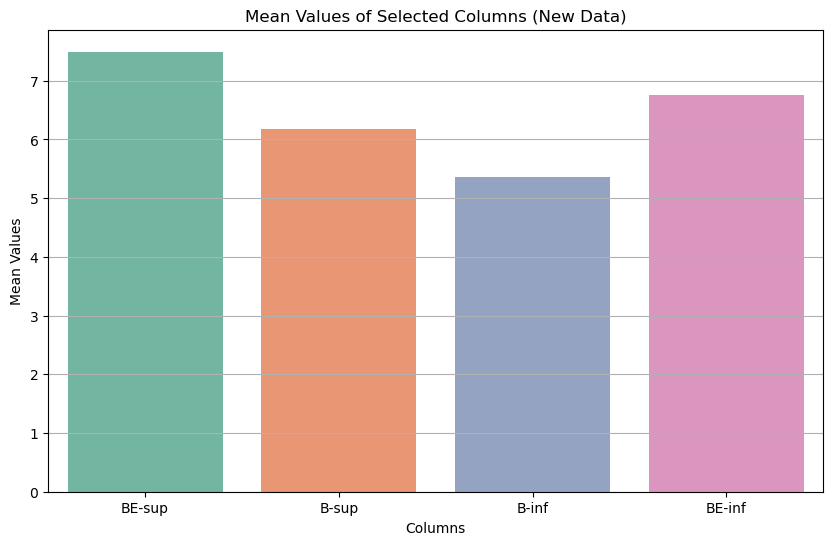

In [9]:
# Plotting the bar graph for the mean of each column without 'C' using seaborn
means_v = df_v[['BE-sup', 'B-sup', 'B-inf', 'BE-inf']].mean().reset_index()
means_v.columns = ['Columns', 'Mean Values']

plt.figure(figsize=(10, 6))
sns.barplot(data=means_v, x='Columns', y='Mean Values', palette='Set2')

plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values of Selected Columns (New Data)')
plt.grid(axis='y')
plt.show()

### Variabilidade

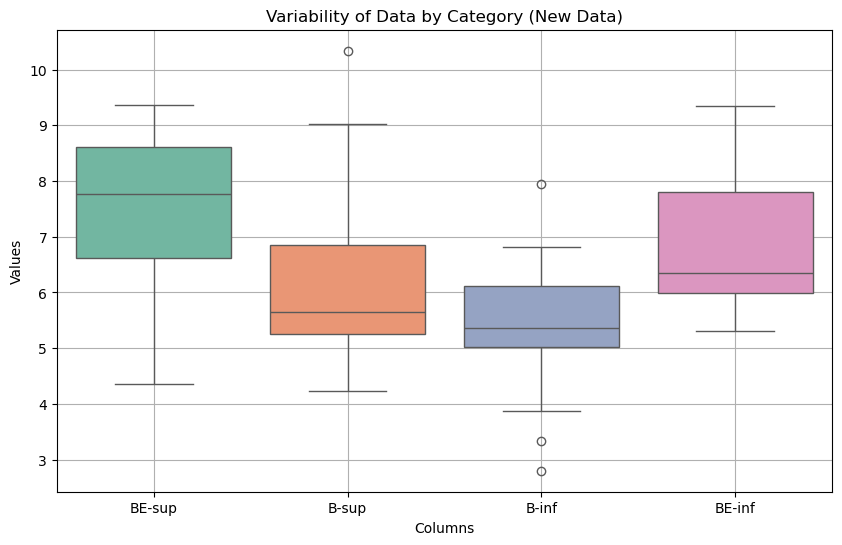

In [10]:
# Plotting a boxplot to show the variability of the data by category using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_v[['BE-sup', 'B-sup', 'B-inf', 'BE-inf']], palette='Set2')

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Variability of Data by Category (New Data)')
plt.grid(True)
plt.show()

### Por CP - Variabilidade ao longo do trecho

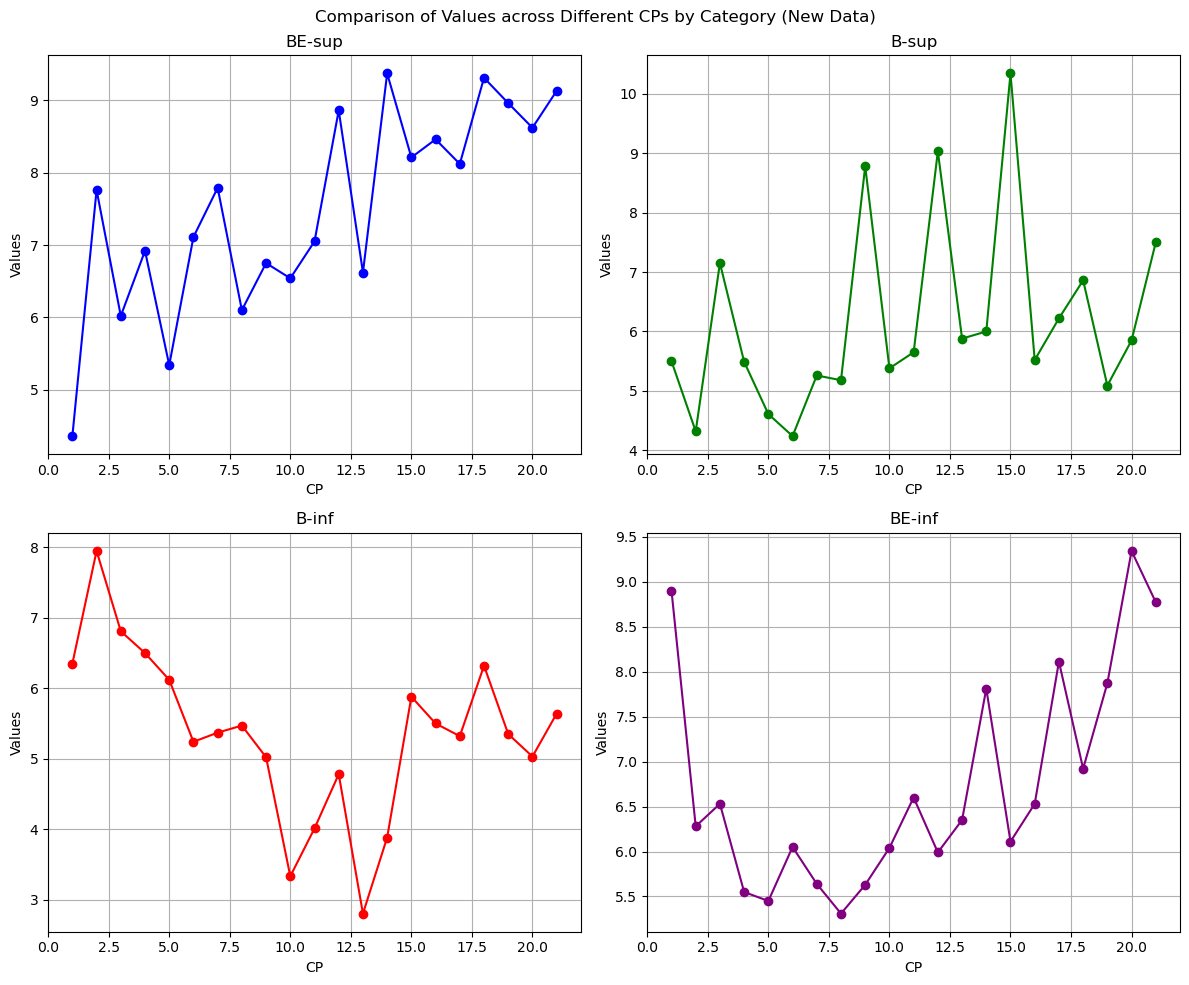

In [11]:
# Line graphs comparison as before in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot BE-sup
axs[0, 0].plot(df_v['CP'], df_v['BE-sup'], label='BE-sup', marker='o', color='blue')
axs[0, 0].set_title('BE-sup')
axs[0, 0].set_xlabel('CP')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)

# Plot B-sup
axs[0, 1].plot(df_v['CP'], df_v['B-sup'], label='B-sup', marker='o', color='green')
axs[0, 1].set_title('B-sup')
axs[0, 1].set_xlabel('CP')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

# Plot B-inf
axs[1, 0].plot(df_v['CP'], df_v['B-inf'], label='B-inf', marker='o', color='red')
axs[1, 0].set_title('B-inf')
axs[1, 0].set_xlabel('CP')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

# Plot BE-inf
axs[1, 1].plot(df_v['CP'], df_v['BE-inf'], label='BE-inf', marker='o', color='purple')
axs[1, 1].set_title('BE-inf')
axs[1, 1].set_xlabel('CP')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

# Adjusting layout
plt.suptitle('Comparison of Values across Different CPs by Category (New Data)')
plt.tight_layout()
plt.show()

### Heatmap

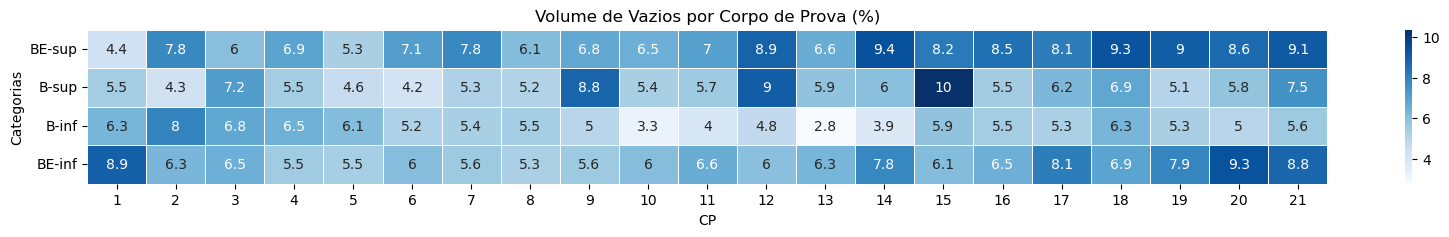

In [23]:
# Heatmap para 'vazios'
plt.figure(figsize=(20, 2))  # Aumenta o comprimento (colunas) e reduz a largura (linhas)
sns.heatmap(df_v.set_index('CP').T, annot=True, cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Volume de Vazios por Corpo de Prova (%)')
plt.xlabel('CP')
plt.ylabel('Categorias')
plt.show()

### Variabilidade lateralx longitudinal

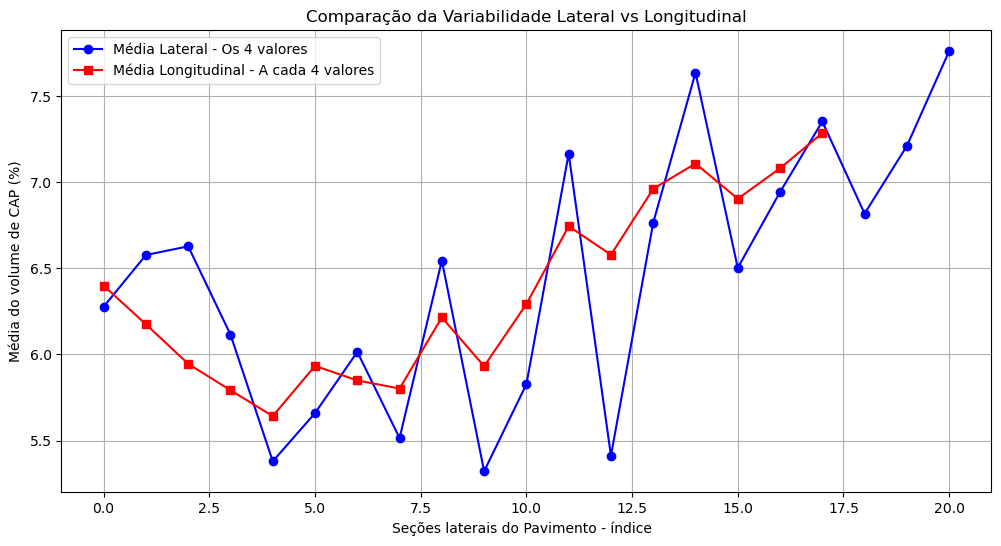

In [54]:
# Média lateral - por linha
df_v['Mean_Lateral'] = df_v[['BE-sup', 'B-sup', 'B-inf', 'BE-inf']].mean(axis=1)

# Média longitudinal - por coluna - primeiros 4, pula 1, e próximos 4 (com sobreposição)
mean_longitudinal_custom = []
for i in range(0, len(df_v) - 3, 1):
    mean_longitudinal_custom.append(df_v.iloc[i:i+4][['BE-sup', 'B-sup', 'B-inf', 'BE-inf']].mean().mean())

mean_longitudinal_custom = np.array(mean_longitudinal_custom)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_v.index, df_v['Mean_Lateral'], label='Média Lateral - Os 4 valores ', marker='o', color='blue')
plt.plot(range(len(mean_longitudinal_custom)), mean_longitudinal_custom, label='Média Longitudinal - A cada 4 valores', marker='s', color='red')

plt.title('Comparação da Variabilidade Lateral vs Longitudinal')
plt.xlabel('Seções laterais do Pavimento - índice  ')
plt.ylabel('Média do volume de CAP (%)')
plt.legend()
plt.grid(True)
plt.show()

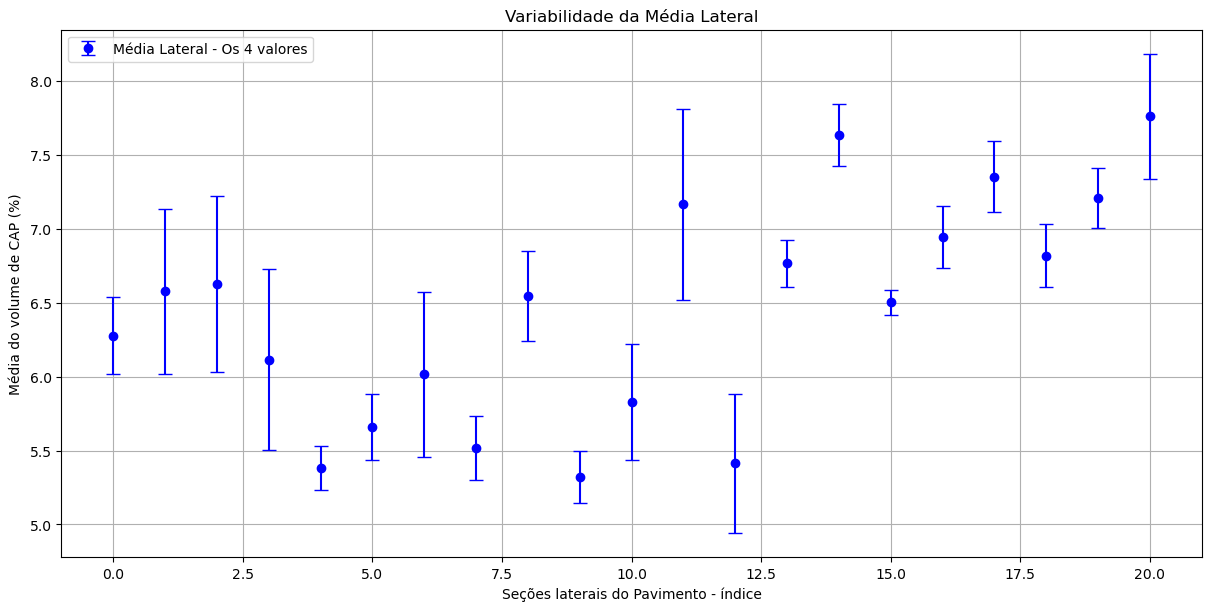

In [55]:
# Criando a figura para o gráfico lateral apenas
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Gráfico para Média Lateral
ax.errorbar(df_v.index, df_v['Mean_Lateral'], yerr=std_lateral, label='Média Lateral - Os 4 valores', marker='o', color='blue', linestyle='none', capsize=5)
ax.set_title('Variabilidade da Média Lateral')
ax.set_xlabel('Seções laterais do Pavimento - índice')
ax.set_ylabel('Média do volume de CAP (%)')
ax.grid(True)
ax.legend()

plt.show()


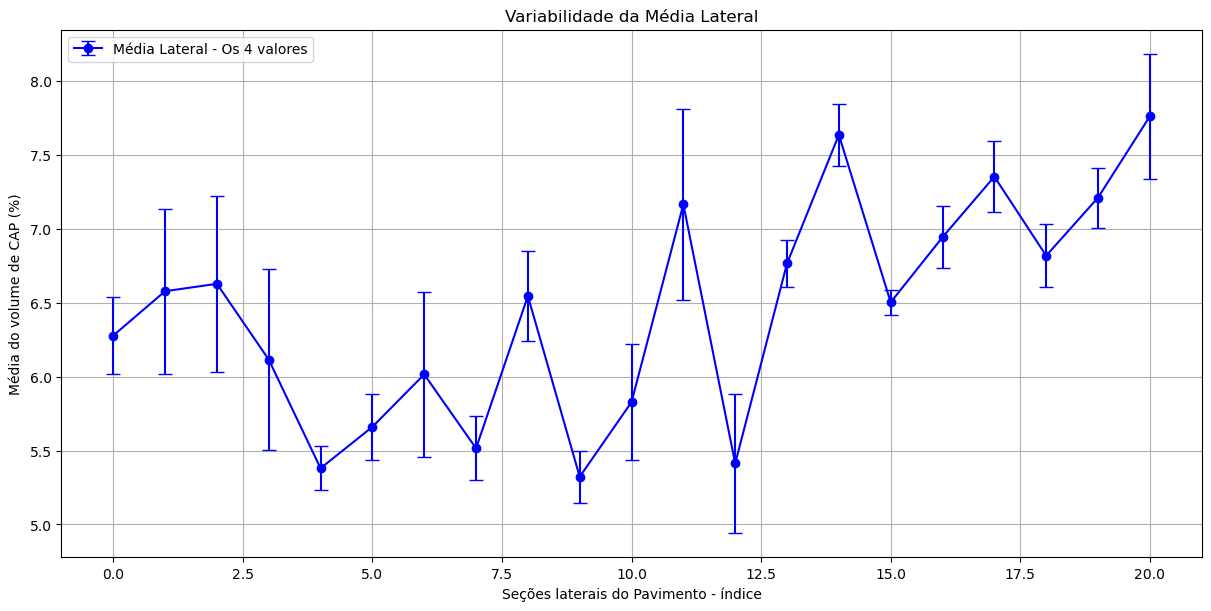

In [56]:
# Criando a figura para o gráfico lateral com linha conectando os pontos médios
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# Gráfico para Média Lateral com linha conectando os pontos médios
ax.errorbar(df_v.index, df_v['Mean_Lateral'], yerr=std_lateral, label='Média Lateral - Os 4 valores', marker='o', color='blue', linestyle='-', capsize=5)
ax.set_title('Variabilidade da Média Lateral')
ax.set_xlabel('Seções laterais do Pavimento - índice')
ax.set_ylabel('Média do volume de CAP (%)')
ax.grid(True)
ax.legend()

plt.show()


# INTEGRANDO O VOLUME DE VAZIOS COM VOLUME DE CAP

## Por CP - linha

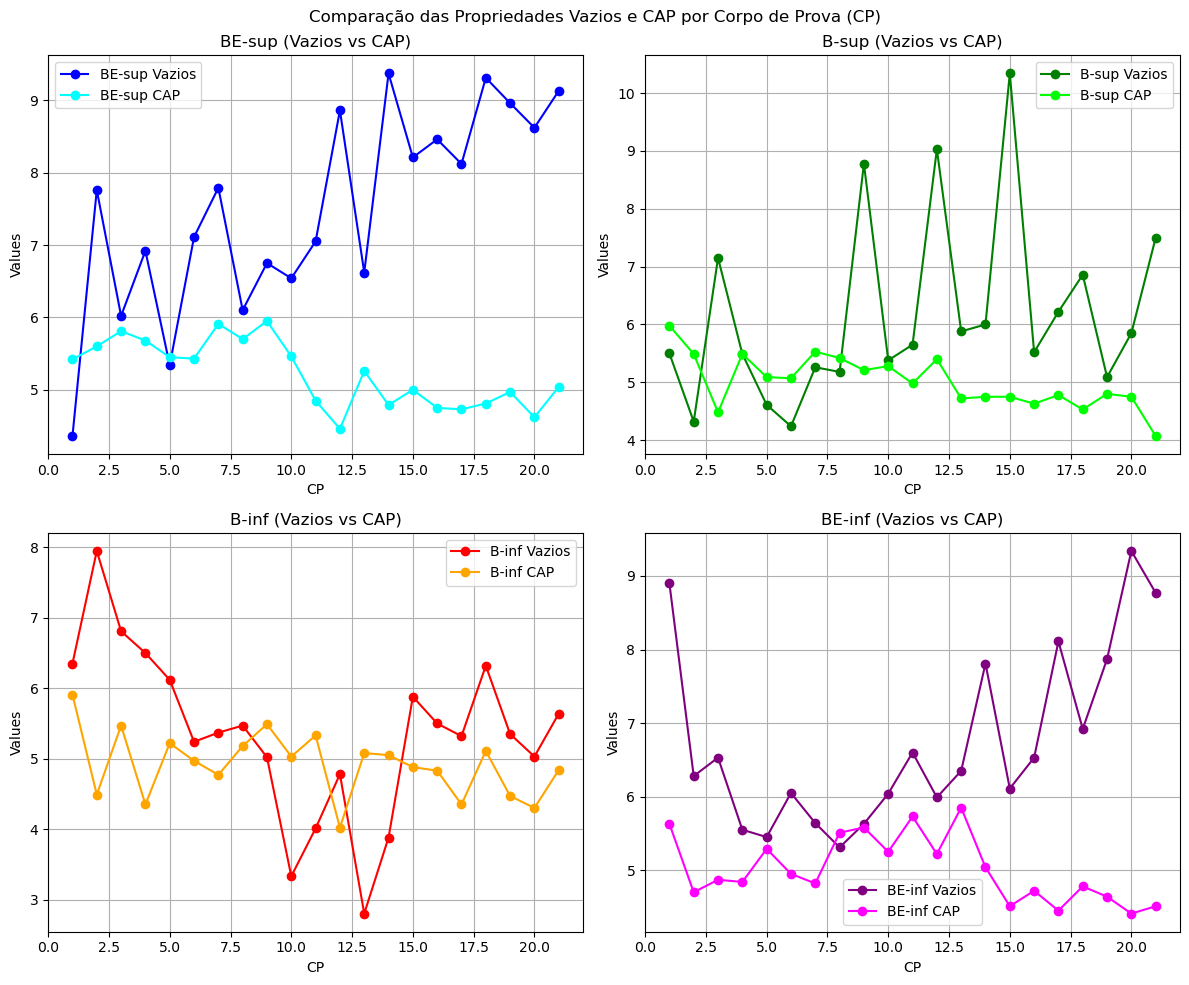

In [12]:
import matplotlib.pyplot as plt

# Supondo que 'df_v' e 'df_cap' já existam e tenham colunas de CP redundantes

# Removendo colunas redundantes e mantendo apenas uma coluna "CP"
df_v = df_v[['CP', 'BE-sup', 'B-sup', 'B-inf', 'BE-inf']]
df_cap = df_cap[['CP', 'BE-sup', 'B-sup', 'B-inf', 'BE-inf']]

# Merge dos dataframes por CP
df_combined = pd.merge(df_v, df_cap, on='CP', suffixes=('_vazios', '_cap'))

# Plotando os gráficos comparando 'vazios' e 'CAP' para cada CP
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico para BE-sup
axs[0, 0].plot(df_combined['CP'], df_combined['BE-sup_vazios'], label='BE-sup Vazios', marker='o', color='blue')
axs[0, 0].plot(df_combined['CP'], df_combined['BE-sup_cap'], label='BE-sup CAP', marker='o', color='cyan')
axs[0, 0].set_title('BE-sup (Vazios vs CAP)')
axs[0, 0].set_xlabel('CP')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Gráfico para B-sup
axs[0, 1].plot(df_combined['CP'], df_combined['B-sup_vazios'], label='B-sup Vazios', marker='o', color='green')
axs[0, 1].plot(df_combined['CP'], df_combined['B-sup_cap'], label='B-sup CAP', marker='o', color='lime')
axs[0, 1].set_title('B-sup (Vazios vs CAP)')
axs[0, 1].set_xlabel('CP')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Gráfico para B-inf
axs[1, 0].plot(df_combined['CP'], df_combined['B-inf_vazios'], label='B-inf Vazios', marker='o', color='red')
axs[1, 0].plot(df_combined['CP'], df_combined['B-inf_cap'], label='B-inf CAP', marker='o', color='orange')
axs[1, 0].set_title('B-inf (Vazios vs CAP)')
axs[1, 0].set_xlabel('CP')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Gráfico para BE-inf
axs[1, 1].plot(df_combined['CP'], df_combined['BE-inf_vazios'], label='BE-inf Vazios', marker='o', color='purple')
axs[1, 1].plot(df_combined['CP'], df_combined['BE-inf_cap'], label='BE-inf CAP', marker='o', color='magenta')
axs[1, 1].set_title('BE-inf (Vazios vs CAP)')
axs[1, 1].set_xlabel('CP')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Ajustando o layout
plt.suptitle('Comparação das Propriedades Vazios e CAP por Corpo de Prova (CP)')
plt.tight_layout()
plt.show()


## Heatmap

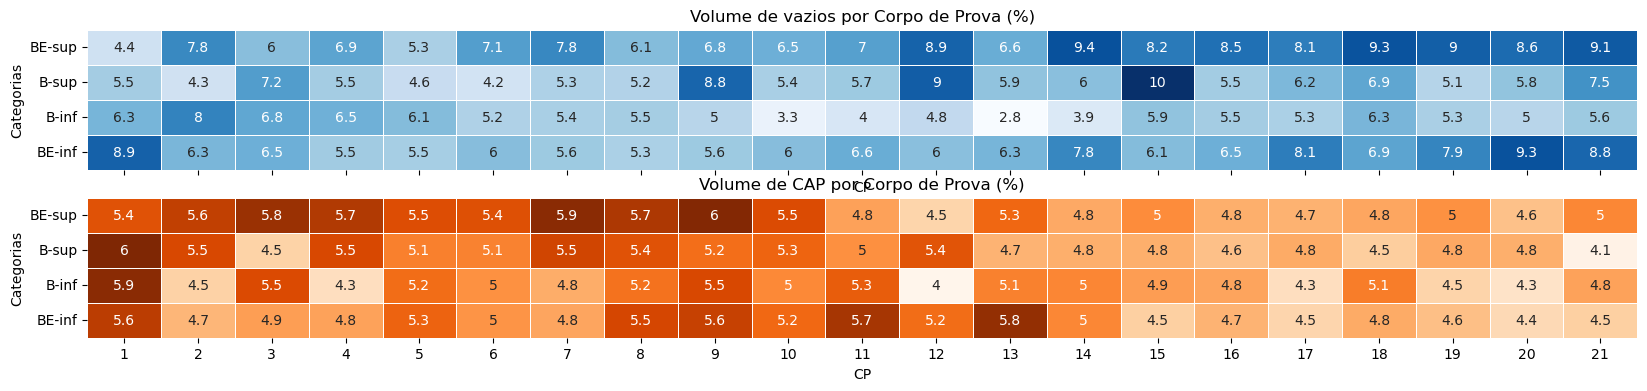

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Primeiro, criaremos dois heatmaps separados, um para "Vazios" e outro para "CAP",
# mas os colocaremos lado a lado para simular a visualização combinada.

fig, axes = plt.subplots(2, 1, figsize=(20, 4), sharex=True)

# Heatmap para 'Vazios'
sns.heatmap(df_v.set_index('CP').T, annot=True, cmap='Blues', cbar=False, linewidths=0.5, ax=axes[0])
axes[0].set_title('Volume de vazios por Corpo de Prova (%)')
axes[0].set_ylabel('Categorias')

# Heatmap para 'CAP'
sns.heatmap(df_cap.set_index('CP').T, annot=True, cmap='Oranges', cbar=False, linewidths=0.5, ax=axes[1])
axes[1].set_title('Volume de CAP por Corpo de Prova (%)')
axes[1].set_ylabel('Categorias')

plt.xlabel('CP')
plt.show()


# PROJEÇÃO NO MAPA

In [71]:
# Dados fornecidos
df_coords = {
    'ID': list(range(1, 106)),
    'X': [548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620],
    'Y': [9574710] * 21 + [9574709] * 21 + [9574708] * 21 + [9574707] * 21 + [9574706] * 21,
    'V': [4.36, 7.76, 6.02, 6.92, 5.34, 7.11, 7.79, 6.10, 6.75, 6.54, 7.05, 8.86, 6.62, 9.37, 8.21, 8.46, 8.12, 9.31, 8.96, 8.62, 9.13,
          5.50, 4.32, 7.15, 5.49, 4.61, 4.24, 5.26, 5.18, 8.78, 5.38, 5.65, 9.03, 5.88, 6.00, 10.34, 5.52, 6.22, 6.86, 5.09, 5.85, 7.50,
          6.05, 5.24, 8.52, 9.51, 7.61, 6.98, 5.80, 6.25, 7.39, 7.80, 6.59, 5.78, 7.58, 7.29, 2.72, 3.78, 5.97, 7.30, 5.34, 7.62, 6.60,
          6.35, 7.95, 6.81, 6.50, 6.12, 5.24, 5.37, 5.47, 5.02, 3.33, 4.01, 4.78, 2.80, 3.88, 5.88, 5.50, 5.32, 6.32, 5.35, 5.03, 5.64,
          8.90, 6.28, 6.53, 5.55, 5.45, 6.05, 5.64, 5.31, 5.63, 6.04, 6.60, 5.99, 6.35, 7.81, 6.11, 6.53, 8.11, 6.92, 7.87, 9.34, 8.77],
    'CAP': [5.42, 5.60, 5.81, 5.68, 5.45, 5.43, 5.91, 5.70, 5.95, 5.46, 4.85, 4.46, 5.26, 4.79, 5.00, 4.75, 4.73, 4.81, 4.97, 4.62, 5.04,
            5.98, 5.49, 4.48, 5.49, 5.09, 5.07, 5.53, 5.42, 5.21, 5.28, 4.98, 5.40, 4.72, 4.75, 4.75, 4.63, 4.78, 4.53, 4.80, 4.75, 4.07,
            5.36, 4.75, 4.28, 3.81, 4.67, 4.05, 5.19, 4.33, 5.03, 4.95, 5.54, 4.05, 3.01, 4.54, 3.06, 3.25, 4.89, 4.04, 3.39, 3.35, 3.64,
            5.91, 4.49, 5.47, 4.35, 5.22, 4.97, 4.77, 5.18, 5.49, 5.03, 5.33, 4.02, 5.08, 5.05, 4.88, 4.83, 4.35, 5.11, 4.47, 4.30, 4.84,
            5.63, 4.70, 4.87, 4.84, 5.29, 4.95, 4.82, 5.51, 5.58, 5.25, 5.73, 5.22, 5.85, 5.04, 4.51, 4.72, 4.45, 4.78, 4.64, 4.41, 4.51]
}

df_coords = pd.DataFrame(df_coords)

In [72]:
df_coords.head()

,ID,X,Y,V,CAP
0,1,548600,9574710,4.36,5.42
1,2,548601,9574710,7.76,5.60
2,3,548602,9574710,6.02,5.81
3,4,548603,9574710,6.92,5.68
4,5,548604,9574710,5.34,5.45


In [79]:
# Dados fornecidos em UTM
data = {
    'ID': list(range(1, 106)),
    'X': [548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620,
          548600, 548601, 548602, 548603, 548604, 548605, 548606, 548607, 548608, 548609, 548610, 548611, 548612, 548613, 548614, 548615, 548616, 548617, 548618, 548619, 548620],
    'Y': [9574710] * 21 + [9574709] * 21 + [9574708] * 21 + [9574707] * 21 + [9574706] * 21
}

df_coords = pd.DataFrame(data)

# Definir a zona UTM e o hemisfério (Ceará está na Zona 24S)
zone_number = 24
hemisphere = 'south'

# Transformar coordenadas UTM para latitude e longitude
transformer = Transformer.from_crs(f"+proj=utm +zone={zone_number} +{hemisphere} +ellps=WGS84 +datum=WGS84 +units=m +no_defs", "EPSG:4326")
df_coords['Latitude'], df_coords['Longitude'] = transformer.transform(df_coords['X'].values, df_coords['Y'].values)

# Selecionando apenas as colunas de Latitude e Longitude
df_google_maps = df_coords[['Latitude', 'Longitude']]

# Salvando em CSV para importar no Google Maps
df_google_maps.to_csv('coordenadas_google_maps.csv', index=False)
